In [1]:
import numpy as np 
import pandas as pd 



In [2]:
df_offensive=pd.read_csv('labeled_data.csv')

In [3]:
df_offensive.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [4]:
import seaborn as sns



In [11]:
df_offensive.shape

(24783, 2)

In [6]:
df_offensive.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [7]:
df_offensive.drop(['Unnamed: 0','count','hate_speech','offensive_language','neither'],axis=1,inplace=True)

In [8]:
df_offensive.head(10)

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
5,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just..."
6,1,"!!!!!!""@__BrighterDays: I can not just sit up ..."
7,1,!!!!&#8220;@selfiequeenbri: cause I'm tired of...
8,1,""" &amp; you might not get ya bitch back &amp; ..."
9,1,""" @rhythmixx_ :hobbies include: fighting Maria..."


In [12]:
df_offensive['class'].unique()

array([2, 1, 0], dtype=int64)

In [13]:
sns.countplot('class',data=df_offensive)

TypeError: countplot() got multiple values for argument 'data'

In [14]:
df_offensive[df_offensive['class']==0]['class']=1

C:\Users\Rishabh\AppData\Local\Temp\ipykernel_6572\2275510384.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_offensive[df_offensive['class']==0]['class']=1


In [15]:
df_offensive.head(5)

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [16]:
df_offensive['class'].unique()

array([2, 1, 0], dtype=int64)

In [17]:
df_offensive[df_offensive['class']==0]

,class,tweet
85,0,"""@Blackman38Tide: @WhaleLookyHere @HowdyDowdy1..."
89,0,"""@CB_Baby24: @white_thunduh alsarabsss"" hes a ..."
110,0,"""@DevilGrimz: @VigxRArts you're fucking gay, b..."
184,0,"""@MarkRoundtreeJr: LMFAOOOO I HATE BLACK PEOPL..."
202,0,"""@NoChillPaz: ""At least I'm not a nigger"" http..."
...,...,...
24576,0,this guy is the biggest faggot omfg
24685,0,which one of these names is more offensive kik...
24751,0,you a pussy ass nigga and I know it nigga.
24776,0,you're all niggers


In [18]:
df_offensive["class"].replace({0: 1}, inplace=True)

In [19]:
df_offensive['class'].unique()

array([2, 1], dtype=int64)

In [20]:
df_offensive['class'].unique()

array([2, 1], dtype=int64)

<Axes: xlabel='class', ylabel='count'>

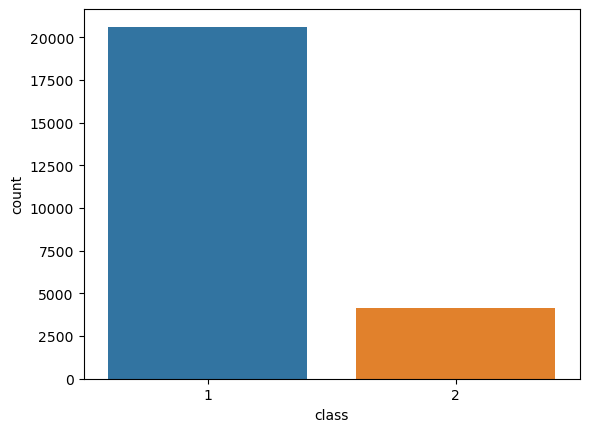

In [21]:
sns.countplot(x='class', data=df_offensive)

In [22]:
df_offensive[df_offensive['class']==0]

,class,tweet


In [23]:
df_offensive["class"].replace({2: 0}, inplace=True)

<Axes: xlabel='class', ylabel='count'>

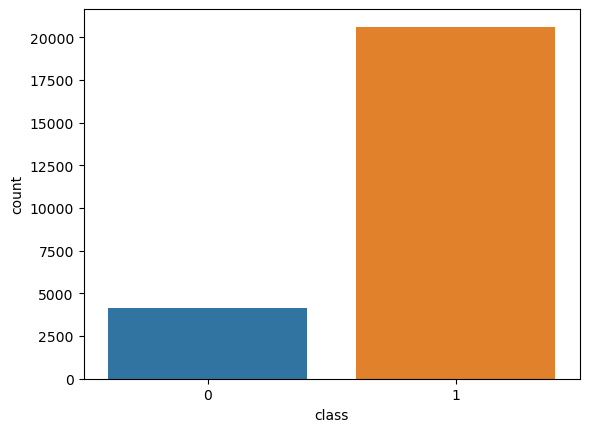

In [24]:
sns.countplot(x='class', data=df_offensive)

In [25]:
df_offensive.rename(columns ={'class':'label'}, inplace = True)
   

In [26]:
df_offensive.head()

,label,tweet
0,0,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [27]:
df_offensive.iloc[0]['tweet']

"!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out..."

In [28]:
df_offensive.iloc[5]['tweet']

'!!!!!!!!!!!!!!!!!!"@T_Madison_x: The shit just blows me..claim you so faithful and down for somebody but still fucking with hoes! &#128514;&#128514;&#128514;"'

In [29]:
sns.countplot('label',data=df)

NameError: name 'df' is not defined

<Axes: xlabel='label', ylabel='count'>

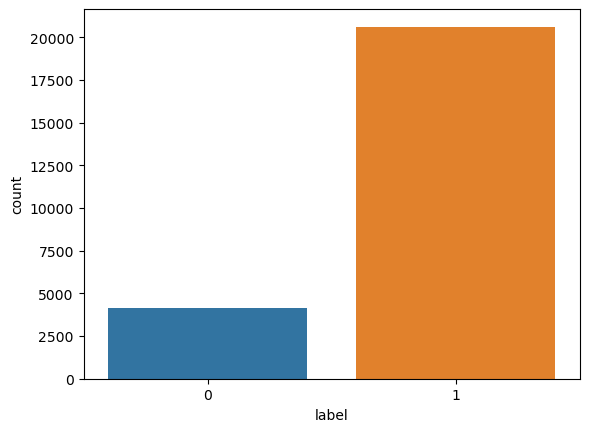

In [30]:
sns.countplot(x='label', data=df_offensive)

In [31]:
df = df_offensive

In [32]:
df.shape

(24783, 2)

In [33]:
31962+24783

56745

In [36]:
import re
import nltk
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

In [37]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

In [38]:
df['tweet']=df['tweet'].apply(clean_text)

In [39]:
df.to_csv('test.csv',index=False)

In [40]:
df.head()

,label,tweet
0,0,rt mayasolov woman shouldnt complain clean ho...
1,1,rt boy dat coldtyga dwn bad cuffin dat hoe ...
2,1,rt urkindofbrand dawg rt ever fuck bitch sta...
3,1,rt cganderson vivabas look like tranni
4,1,rt shenikarobert shit hear might true might f...


In [41]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
  

In [42]:
def make_wordcloud(df):
    comment_words=""
    for val in df.tweet: 
        val = str(val).lower()

      
        comment_words += " ".join(val)+" "
    print(comment_words[0:100])
    wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,min_font_size = 10).generate(comment_words)
  
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()

In [43]:
df.to_csv('testing.csv',index=False)
df

,label,tweet
0,0,rt mayasolov woman shouldnt complain clean ho...
1,1,rt boy dat coldtyga dwn bad cuffin dat hoe ...
2,1,rt urkindofbrand dawg rt ever fuck bitch sta...
3,1,rt cganderson vivabas look like tranni
4,1,rt shenikarobert shit hear might true might f...
...,...,...
24778,1,yous muthafin lie coreyemanuel right tl tras...
24779,0,youv gone broke wrong heart babi drove redneck...
24780,1,young buck wanna eat dat nigguh like aint fuck...
24781,1,youu got wild bitch tellin lie


In [44]:
x=df['tweet']
y=df['label']
type(x)

pandas.core.series.Series

In [45]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)


#print(len(x_train), len(y_train))
#print(len(x_test), len(y_test))
type(x_train)

pandas.core.series.Series

In [46]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english', ngram_range=(1,5),max_features=10000)
x_train_vectorizer=count.fit_transform(x_train)

In [47]:
x_test_vectorizer=count.transform(x_test)
x_train_vectorizer.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [48]:
count.vocabulary_

{'rt': 7391,
 'big': 704,
 'night': 6328,
 'wcvb': 9521,
 'baker': 547,
 'debat': 2261,
 'wild': 9652,
 'world': 9763,
 'seri': 7900,
 'game': 3398,
 'world seri': 9767,
 'bitch': 752,
 'text': 8748,
 'right': 7332,
 'follow': 3100,
 'inch': 4583,
 'rim': 7346,
 'tv': 9163,
 'straight': 8468,
 'ass': 364,
 'teeth': 8714,
 'messag': 5842,
 'ima': 4543,
 'kill': 4888,
 'bitch text': 1181,
 'text messag': 8755,
 'ima kill': 4548,
 'im': 4413,
 'miss': 5921,
 'far': 2937,
 'rest': 7284,
 'ol': 6466,
 'girl': 3465,
 'booti': 1366,
 'yall': 9845,
 'funni': 3374,
 'shit': 7964,
 'im miss': 4483,
 'miss bitch': 5922,
 'funni shit': 3376,
 'hope': 4258,
 'shes': 7942,
 'bird': 726,
 'went': 9578,
 'togeth': 8956,
 'kayysavag': 4854,
 'ion': 4642,
 'talk': 8631,
 'lol': 5451,
 'kayysavag bitch': 4855,
 'ion talk': 4645,
 'talk shit': 8648,
 'everybodi': 2805,
 'turn': 9142,
 'asshol': 430,
 'year': 9900,
 'look': 5491,
 'look bitch': 5495,
 'lmaoo': 5422,
 'sayin': 7800,
 'statement': 8390,
 'tr

In [49]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer()

x_train_tfidf = tfidf.fit_transform(x_train_vectorizer)

x_train_tfidf.toarray()
x_test_tfidf = tfidf.transform(x_test_vectorizer)

In [50]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [51]:
model_vectorizer= MultinomialNB().fit(x_train_vectorizer, y_train)
prediction_vectorizer=model_vectorizer.predict(x_test_vectorizer)
print(confusion_matrix(y_test,prediction_vectorizer))
print (classification_report(y_test, prediction_vectorizer))

[[ 790  251]
 [ 162 4993]]
              precision    recall  f1-score   support

           0       0.83      0.76      0.79      1041
           1       0.95      0.97      0.96      5155

    accuracy                           0.93      6196
   macro avg       0.89      0.86      0.88      6196
weighted avg       0.93      0.93      0.93      6196



In [52]:
model_tfidf= MultinomialNB().fit(x_train_tfidf, y_train)
prediction_tfidf=model_tfidf.predict(x_test_tfidf)
print (classification_report(y_test, prediction_tfidf))
print(confusion_matrix(y_test,prediction_tfidf))

              precision    recall  f1-score   support

           0       0.91      0.34      0.50      1041
           1       0.88      0.99      0.93      5155

    accuracy                           0.88      6196
   macro avg       0.90      0.67      0.72      6196
weighted avg       0.89      0.88      0.86      6196

[[ 358  683]
 [  35 5120]]


In [53]:
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding,SpatialDropout1D
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.models import Sequential


In [54]:
from keras.utils import pad_sequences


In [55]:
max_words = 50000
max_len = 300
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)
sequences = tokenizer.texts_to_sequences(x_train)
sequences_matrix = pad_sequences(sequences,maxlen=max_len)

In [56]:
model = Sequential()
model.add(Embedding(max_words, 100, input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 100)          5000000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 300, 100)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 5,080,501
Trainable params: 5,080,501
Non-trainable params: 0
_________________________________________________________________


In [57]:
from keras.callbacks import EarlyStopping,ModelCheckpoint

stop = EarlyStopping(
    monitor='val_accuracy', 
    mode='max',
    patience=5
)

checkpoint= ModelCheckpoint(
    filepath='./',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [58]:
history=model.fit(sequences_matrix,y_train,batch_size=1024,epochs=10,
          validation_split=0.1,callbacks=[stop,checkpoint])

Epoch 1/10
17/17 [==============================] - 296s 17s/step - loss: 0.4943 - accuracy: 0.8040 - val_loss: 0.4251 - val_accuracy: 0.8306
Epoch 2/10
17/17 [==============================] - 387s 23s/step - loss: 0.3628 - accuracy: 0.8367 - val_loss: 0.2920 - val_accuracy: 0.8381
Epoch 3/10
17/17 [==============================] - 534s 32s/step - loss: 0.2222 - accuracy: 0.9011 - val_loss: 0.1840 - val_accuracy: 0.9150
Epoch 4/10
17/17 [==============================] - 644s 38s/step - loss: 0.1322 - accuracy: 0.9548 - val_loss: 0.1545 - val_accuracy: 0.9376
Epoch 5/10
17/17 [==============================] - 705s 41s/step - loss: 0.0984 - accuracy: 0.9671 - val_loss: 0.1403 - val_accuracy: 0.9451
Epoch 6/10
17/17 [==============================] - 738s 43s/step - loss: 0.0722 - accuracy: 0.9756 - val_loss: 0.1376 - val_accuracy: 0.9505
Epoch 7/10
17/17 [==============================] - 815s 48s/step - loss: 0.0584 - accuracy: 0.9800 - val_loss: 0.1463 - val_accuracy: 0.9451
Epoch 

In [59]:
history.history

{'loss': [0.4943087697029114,
  0.3628343641757965,
  0.22223861515522003,
  0.132232666015625,
  0.0983625128865242,
  0.07218168675899506,
  0.05841245502233505,
  0.04904032498598099,
  0.04022242873907089,
  0.032151129096746445],
 'accuracy': [0.803981363773346,
  0.8366810083389282,
  0.9011238813400269,
  0.9548063278198242,
  0.9670612215995789,
  0.9756097793579102,
  0.9800334572792053,
  0.9842180609703064,
  0.9863103628158569,
  0.989598274230957],
 'val_loss': [0.4251023828983307,
  0.2920495867729187,
  0.18397562205791473,
  0.15451198816299438,
  0.14034298062324524,
  0.13762111961841583,
  0.14628782868385315,
  0.14427921175956726,
  0.14596928656101227,
  0.19723175466060638],
 'val_accuracy': [0.8305540680885315,
  0.8380849957466125,
  0.9150080680847168,
  0.93760085105896,
  0.945131778717041,
  0.9505110383033752,
  0.945131778717041,
  0.9478214383125305,
  0.945131778717041,
  0.9338353872299194]}

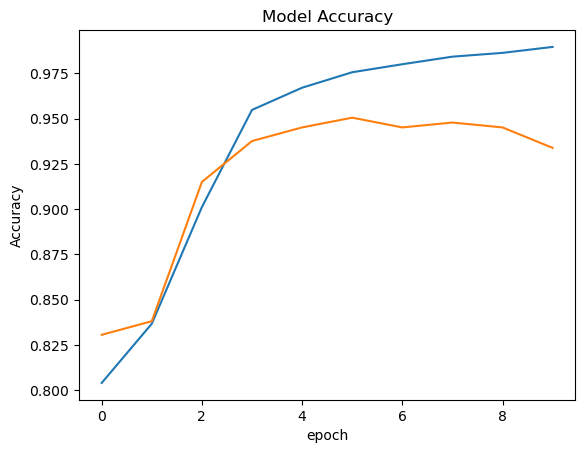

In [60]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
#plt.legend(['train'],loc='upper left')
plt.show()

In [61]:
test_sequences = tokenizer.texts_to_sequences(x_test)
test_sequences_matrix = pad_sequences(test_sequences,maxlen=max_len)

In [62]:
accr = model.evaluate(test_sequences_matrix,y_test)

194/194 [==============================] - 17s 85ms/step - loss: 0.2479 - accuracy: 0.9245


In [63]:
lstm_prediction=model.predict(test_sequences_matrix)

194/194 [==============================] - 14s 72ms/step


In [64]:
res=[]
for prediction in lstm_prediction:
    if prediction[0]<0.5:
        res.append(0)
    else:
        res.append(1)

In [65]:
print(confusion_matrix(y_test,res))

[[ 672  369]
 [  99 5056]]


In [72]:
from sklearn.metrics import precision_score, recall_score, mean_squared_error, accuracy_score, f1_score, roc_auc_score, confusion_matrix

# Assuming you have already split your data into x_test and y_test

# Preprocess the test data
test_sequences = tokenizer.texts_to_sequences(x_test)
test_sequences_matrix = pad_sequences(test_sequences, maxlen=max_len)

# Evaluate the model on the test set
accr = model.evaluate(test_sequences_matrix, y_test)

# Make predictions on the test set
lstm_prediction = model.predict(test_sequences_matrix)
res = [1 if pred[0] >= 0.5 else 0 for pred in lstm_prediction]

# Calculate metrics
precision = precision_score(y_test, res)
recall = recall_score(y_test, res)
mse = mean_squared_error(y_test, res)
accuracy = accuracy_score(y_test, res)
f1 = f1_score(y_test, res)
auc = roc_auc_score(y_test, lstm_prediction)

# Print or use these metrics as needed
print("Precision:", precision)
print("Recall:", recall)
print("Mean Square Error:", mse)
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("AUC:", auc)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, res)
print("Confusion Matrix:")
print(conf_matrix)


194/194 [==============================] - 11s 57ms/step
Precision: 0.9319815668202766
Recall: 0.9807953443258972
Mean Square Error: 0.07553260167850226
Accuracy: 0.9244673983214977
F1 Score: 0.9557655954631381
AUC: 0.96853516027173
Confusion Matrix:
[[ 672  369]
 [  99 5056]]
